## Project
### Build a model to detect fraudulent credit card transaction . experiment with algorithms like Logistic Regression, Decision Trees,or Random Forests to classify transaction as fraudulent or legitimate.

## Importing all necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

## Load the Data

In [2]:
df = pd.read_csv('fraudTest[1].csv')

## Initial Inspection

In [3]:
df.shape

(555719, 23)

In [4]:
df.sample(5)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
154864,154864,2020-08-14 16:43:47,4642894980163,fraud_Conroy Ltd,shopping_pos,9.27,Eddie,Mendez,M,1831 Faith View Suite 653,...,40.7491,-95.0380,7297,IT trainer,1990-07-13,e5eea6b0691078f62380e3ea9a5785d2,1376498627,41.607156,-94.893272,0
254604,254604,2020-09-22 09:11:13,4716561796955522,fraud_Morar Inc,grocery_net,63.56,Lauren,Anderson,F,11014 Chad Lake Apt. 573,...,48.2777,-112.8456,743,Water engineer,1972-05-04,3cf9e5fa2125f7bf4fc3a2bffee30bc5,1379841073,48.035861,-111.988299,0
272487,272487,2020-09-29 22:50:05,36485887555770,fraud_Kris-Weimann,misc_net,82.42,Michael,Gross,M,230 Ryan Tunnel Apt. 025,...,40.4971,-82.8342,267,Facilities manager,2005-01-29,bb31401082ffdf2ec02f285f266627e9,1380495005,40.791542,-82.231092,0
178802,178802,2020-08-23 10:48:44,4149238353975790,fraud_Luettgen PLC,gas_transport,69.21,Tanner,Carroll,M,494 Burke Ports,...,40.1008,-80.0652,632,Dealer,1989-04-08,70fee541620f9013491a28d34310499c,1377254924,39.414810,-80.029526,0
338715,338715,2020-10-29 10:34:33,213112402583773,fraud_Bartoletti-Wunsch,gas_transport,53.50,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,303f97dc9a597a3567d168e5681b5cc9,1383042873,34.727762,-83.147209,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## Data Cleaning

In [6]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Statistical Summary

In [8]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [9]:
df['is_fraud'].unique()

array([0, 1], dtype=int64)

In [10]:
corr = df.corr()

C:\Users\angel\AppData\Local\Temp\ipykernel_30160\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [11]:
corr

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,-0.000823,-0.001137,0.001479,0.000336,-0.001558,-0.000794,0.997054,0.000394,-0.001586,-0.013892
cc_num,-0.000823,1.000000,0.001963,0.041610,-0.057512,-0.048783,-0.009414,-0.000810,-0.057183,-0.048818,-0.001540
amt,-0.001137,0.001963,1.000000,0.002310,0.002339,-0.002046,0.002760,-0.000974,0.002404,-0.002053,0.182267
zip,0.001479,0.041610,0.002310,1.000000,-0.115173,-0.909942,0.075571,0.001395,-0.114809,-0.909117,-0.002271
lat,0.000336,-0.057512,0.002339,-0.115173,1.000000,-0.012892,-0.152666,0.000301,0.993557,-0.012831,0.005863
long,-0.001558,-0.048783,-0.002046,-0.909942,-0.012892,1.000000,-0.051524,-0.001460,-0.012551,0.999115,-0.000972
city_pop,-0.000794,-0.009414,0.002760,0.075571,-0.152666,-0.051524,1.000000,-0.000740,-0.151703,-0.051489,-0.004910
unix_time,0.997054,-0.000810,-0.000974,0.001395,0.000301,-0.001460,-0.000740,1.000000,0.000365,-0.001485,-0.013066
merch_lat,0.000394,-0.057183,0.002404,-0.114809,0.993557,-0.012551,-0.151703,0.000365,1.000000,-0.012496,0.005812
merch_long,-0.001586,-0.048818,-0.002053,-0.909117,-0.012831,0.999115,-0.051489,-0.001485,-0.012496,1.000000,-0.001060


## Data Visualization

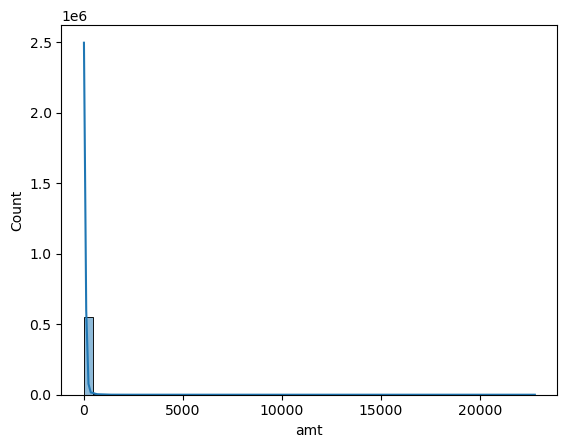

In [12]:
sns.histplot(df['amt'],bins=50,kde=True)
plt.show()

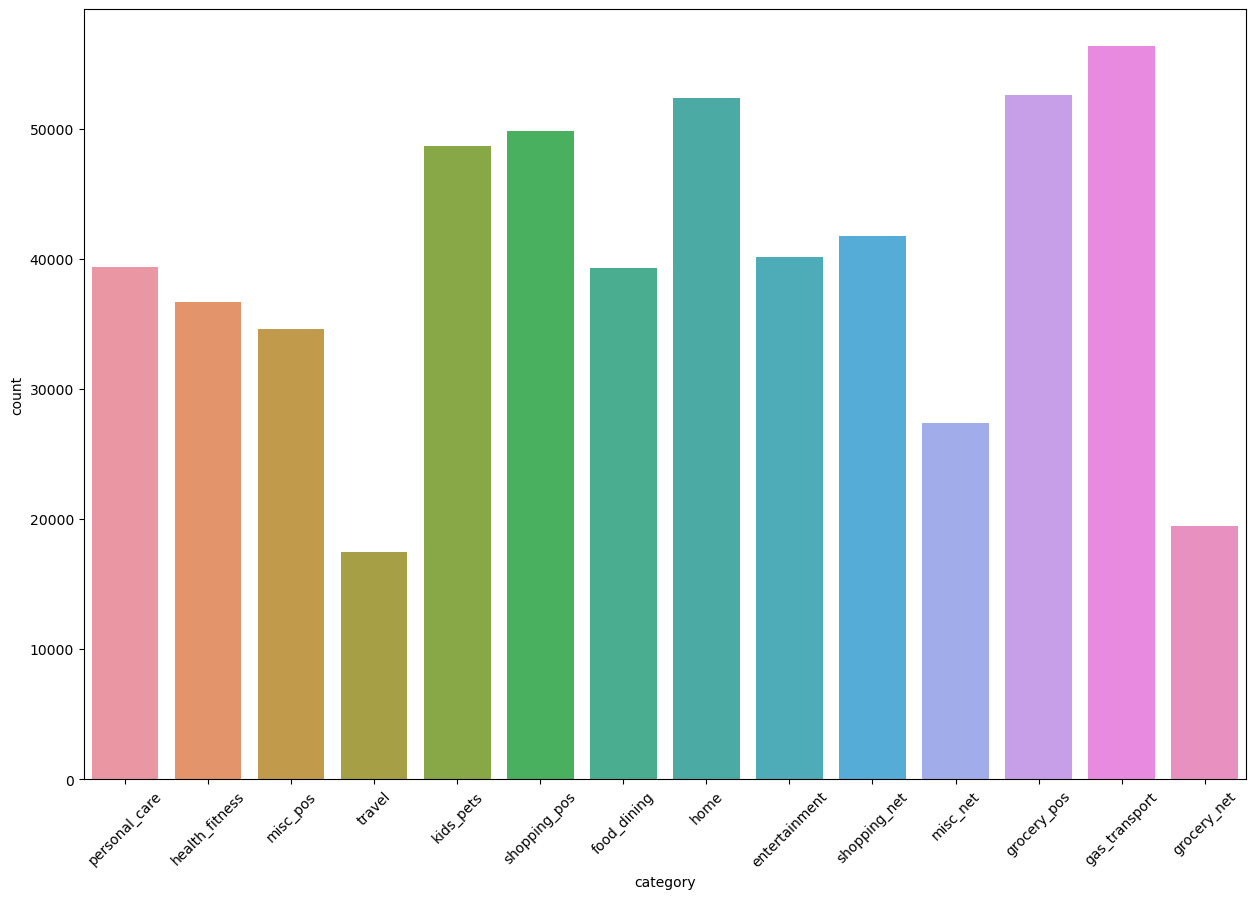

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='category')
plt.xticks(rotation=45)
plt.show()

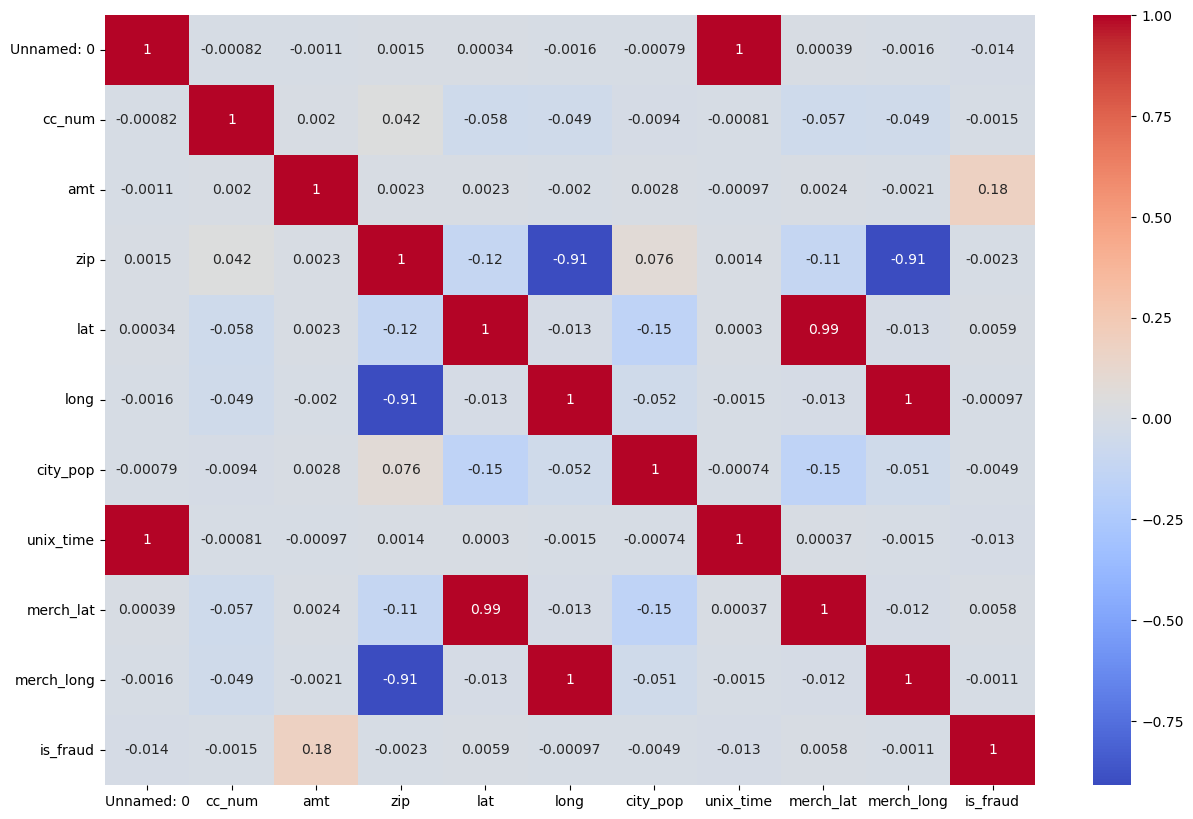

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

<Axes: xlabel='is_fraud', ylabel='count'>

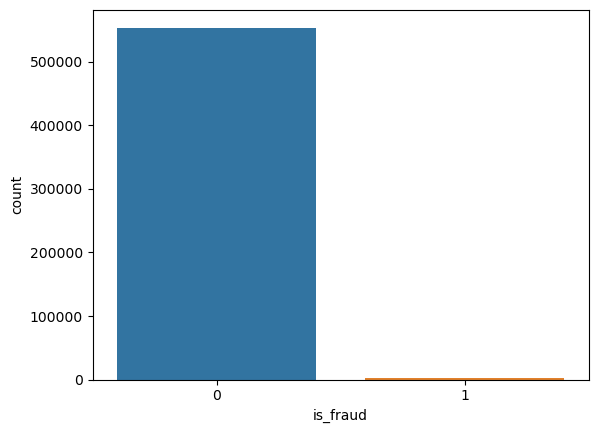

In [15]:
sns.countplot(data=df,x='is_fraud')

## Feature Engineering

In [16]:
# convert 'dob' to age

In [17]:
df['dob']=pd.to_datetime(df['dob'])
df['age']=(pd.to_datetime('today')-df['dob']).dt.days//365

In [18]:
# One-hot encode categorical variables with drop_first = Ture to avoid multicollinearity

In [19]:
df = pd.get_dummies(df,columns=['category','gender','job'],drop_first=True)

In [20]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,...,job_Video editor,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,2.86,Jeff,Elliott,351 Darlene Green,Columbia,SC,...,0,0,0,0,0,0,0,0,0,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,29.84,Joanne,Williams,3638 Marsh Union,Altonah,UT,...,0,0,0,0,0,0,0,0,0,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",41.28,Ashley,Lopez,9333 Valentine Point,Bellmore,NY,...,0,0,0,0,0,0,0,0,0,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,60.05,Brian,Williams,32941 Krystal Mill Apt. 552,Titusville,FL,...,0,0,0,0,0,0,0,0,0,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,3.19,Nathan,Massey,5783 Evan Roads Apt. 465,Falmouth,MI,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# convert trans_date_trans_cloumn to float and transform it into new subcolumns

In [22]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [23]:
df['trans_year']=df['trans_date_trans_time'].dt.year
df['trans_month']=df['trans_date_trans_time'].dt.month
df['trans_day']=df['trans_date_trans_time'].dt.day
df['trans_hour']=df['trans_date_trans_time'].dt.hour
df['trans_minute'] = df['trans_date_trans_time'].dt.minute
df['trans_second'] = df['trans_date_trans_time'].dt.second

In [24]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,...,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,2.86,Jeff,Elliott,351 Darlene Green,Columbia,SC,...,0,0,0,0,2020,6,21,12,14,25
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,29.84,Joanne,Williams,3638 Marsh Union,Altonah,UT,...,0,0,0,0,2020,6,21,12,14,33
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",41.28,Ashley,Lopez,9333 Valentine Point,Bellmore,NY,...,0,0,0,0,2020,6,21,12,14,53
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,60.05,Brian,Williams,32941 Krystal Mill Apt. 552,Titusville,FL,...,0,0,0,0,2020,6,21,12,15,15
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,3.19,Nathan,Massey,5783 Evan Roads Apt. 465,Falmouth,MI,...,0,0,0,0,2020,6,21,12,15,17


In [25]:
# drop columns whose dtype is object and which are not useful

In [26]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['merchant', 'first', 'last', 'street', 'city', 'state', 'trans_num'], dtype='object')


In [27]:
df.drop(columns=['cc_num','first','last','street','city_pop','trans_num','dob'],inplace=True)

In [28]:
df = df.drop(columns=['trans_date_trans_time','merchant','city','state'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Columns: 507 entries, Unnamed: 0 to trans_second
dtypes: float64(5), int64(11), uint8(491)
memory usage: 328.1 MB


In [30]:
print(df.select_dtypes(include=['object']).columns)

Index([], dtype='object')


### as we know our data set is highly imbalance so we create a new_df

In [31]:
df['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [32]:
# separating the data set for analysis

In [33]:
legit = df[df['is_fraud']==0]

In [34]:
legit.describe()

,Unnamed: 0,amt,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud,age,...,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second
count,553574.000000,553574.000000,553574.000000,553574.000000,553574.000000,5.535740e+05,553574.000000,553574.000000,553574.0,553574.000000,...,553574.000000,553574.000000,553574.000000,553574.000000,553574.0,553574.000000,553574.000000,553574.000000,553574.000000,553574.000000
mean,277997.725990,67.614408,48846.424285,38.541406,-90.230495,1.380683e+09,38.540954,-90.230474,0.0,50.132763,...,0.000405,0.001998,0.001908,0.000428,2020.0,9.509982,16.469034,12.804107,29.504209,29.492771
std,160496.162903,152.471931,26855.813540,5.061194,13.720111,5.203038e+06,5.095755,13.731399,0.0,17.451392,...,0.020112,0.044654,0.043634,0.020687,0.0,1.978824,8.955308,6.796887,17.341352,17.304656
min,0.000000,1.000000,1257.000000,20.027100,-165.672300,1.371817e+09,19.027422,-166.671575,0.0,19.000000,...,0.000000,0.000000,0.000000,0.000000,2020.0,6.000000,1.000000,0.000000,0.000000,0.000000
25%,139011.250000,9.600000,26292.000000,34.668900,-96.798000,1.376031e+09,34.754055,-96.906402,0.0,37.000000,...,0.000000,0.000000,0.000000,0.000000,2020.0,8.000000,9.000000,7.000000,14.000000,15.000000
50%,278009.500000,47.150000,48174.000000,39.371600,-87.476900,1.380770e+09,39.374616,-87.443645,0.0,48.000000,...,0.000000,0.000000,0.000000,0.000000,2020.0,10.000000,17.000000,14.000000,30.000000,29.000000
75%,417073.750000,82.620000,72042.000000,41.894800,-80.175200,1.385872e+09,41.953397,-80.265911,0.0,61.000000,...,0.000000,0.000000,0.000000,0.000000,2020.0,12.000000,24.000000,19.000000,45.000000,44.000000
max,555718.000000,22768.110000,99783.000000,65.689900,-67.950300,1.388534e+09,66.679297,-66.952026,0.0,99.000000,...,1.000000,1.000000,1.000000,1.000000,2020.0,12.000000,31.000000,23.000000,59.000000,59.000000


In [35]:
fraud = df[df['is_fraud']==1]

In [36]:
print(fraud.shape)
print(legit.shape)

(2145, 507)
(553574, 507)


In [37]:
fraud.describe()

,Unnamed: 0,amt,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud,age,...,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2.145000e+03,2145.000000,2145.000000,2145.0,2145.000000,...,2145.0,2145.0,2145.000000,2145.0,2145.0,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000
mean,242057.088112,528.356494,47862.900233,39.019971,-90.445556,1.379587e+09,39.018618,-90.465222,1.0,52.303963,...,0.0,0.0,0.005594,0.0,2020.0,9.135198,15.139860,14.087646,28.937063,29.653613
std,135455.280233,392.747594,26706.283776,5.076671,14.147521,4.546697e+06,5.093782,14.159252,0.0,17.643968,...,0.0,0.0,0.074604,0.0,0.0,1.772877,8.859445,9.699821,17.109100,17.210148
min,1685.000000,1.780000,1257.000000,20.082700,-155.488000,1.371852e+09,19.161782,-156.480766,1.0,22.000000,...,0.0,0.0,0.000000,0.0,2020.0,6.000000,1.000000,0.000000,0.000000,0.000000
25%,131562.000000,214.510000,23937.000000,34.957200,-96.743000,1.375756e+09,35.017480,-96.697100,1.0,38.000000,...,0.0,0.0,0.000000,0.0,2020.0,8.000000,7.000000,3.000000,15.000000,15.000000
50%,245890.000000,371.940000,47987.000000,39.893600,-88.093500,1.379548e+09,39.744929,-88.040722,1.0,51.000000,...,0.0,0.0,0.000000,0.0,2020.0,9.000000,14.000000,22.000000,28.000000,29.000000
75%,346223.000000,907.770000,68031.000000,42.180800,-79.785600,1.383350e+09,42.208725,-79.909134,1.0,65.000000,...,0.0,0.0,0.000000,0.0,2020.0,11.000000,24.000000,23.000000,44.000000,45.000000
max,517571.000000,1320.920000,99921.000000,55.473200,-67.950300,1.387754e+09,56.214113,-66.960745,1.0,99.000000,...,0.0,0.0,1.000000,0.0,2020.0,12.000000,31.000000,23.000000,59.000000,59.000000


In [38]:
df.groupby('is_fraud').mean()

,Unnamed: 0,amt,zip,lat,long,unix_time,merch_lat,merch_long,age,category_food_dining,...,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,277997.725990,67.614408,48846.424285,38.541406,-90.230495,1.380683e+09,38.540954,-90.230474,50.132763,0.070838,...,0.000405,0.001998,0.001908,0.000428,2020.0,9.509982,16.469034,12.804107,29.504209,29.492771
1,242057.088112,528.356494,47862.900233,39.019971,-90.445556,1.379587e+09,39.018618,-90.465222,52.303963,0.025175,...,0.000000,0.000000,0.005594,0.000000,2020.0,9.135198,15.139860,14.087646,28.937063,29.653613


## Under sampling to handle imbalance of the Data

In [39]:
legit_sample = legit.sample(n=2145)

In [40]:
new_df=pd.concat([legit_sample,fraud],axis=0)

In [41]:
# compare the values for both transaction

In [42]:
new_df.tail()

,Unnamed: 0,amt,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud,age,...,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second
517197,517197,1041.51,38668,34.6323,-89.8855,1387749948,34.573471,-89.911011,1,65,...,0,0,0,0,2020,12,22,22,5,48
517274,517274,868.09,38668,34.6323,-89.8855,1387750687,34.091227,-90.390612,1,65,...,0,0,0,0,2020,12,22,22,18,7
517341,517341,1039.42,38668,34.6323,-89.8855,1387751508,34.628434,-90.284780,1,65,...,0,0,0,0,2020,12,22,22,31,48
517529,517529,289.27,38668,34.6323,-89.8855,1387753563,34.746063,-90.401093,1,65,...,0,0,0,0,2020,12,22,23,6,3
517571,517571,766.38,38668,34.6323,-89.8855,1387754019,33.771462,-90.651342,1,65,...,0,0,0,0,2020,12,22,23,13,39


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
numerical_feature = ['amt','zip','lat','long','unix_time','merch_lat','merch_long','age']

In [45]:
scaler = StandardScaler()

In [46]:
new_df[numerical_feature] = scaler.fit_transform(new_df[numerical_feature])

In [47]:
new_df.drop(columns=['Unnamed: 0'],inplace=True)

In [48]:
new_df

,amt,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud,age,category_food_dining,...,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second
484425,-0.800629,-0.102538,0.380520,0.472596,1.408444,0.267950,0.502456,0,0.573723,0,...,0,0,0,0,2020,12,15,19,20,26
341159,-0.677824,-0.986416,0.038868,0.966232,0.606313,-0.119462,0.955026,0,-0.666865,0,...,0,0,0,0,2020,10,30,18,18,56
351670,-0.780311,-1.746612,0.803804,1.400814,0.676098,0.683130,1.350670,0,-0.441304,0,...,0,0,0,0,2020,11,3,18,27,6
449189,-0.503152,-0.553490,-2.143474,0.619244,1.276509,-2.024520,0.666951,0,0.630113,0,...,0,0,0,0,2020,12,8,5,35,5
78565,-0.639250,-0.925321,-0.312505,0.924599,-1.201248,-0.198909,0.951792,0,-0.215742,0,...,0,0,0,0,2020,7,19,0,11,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,2.021142,-0.372295,-0.811991,0.042031,1.532395,-0.820972,0.040680,1,0.799284,0,...,0,0,0,0,2020,12,22,22,5,48
517274,1.550702,-0.372295,-0.811991,0.042031,1.532544,-0.916780,0.005870,1,0.799284,0,...,0,0,0,0,2020,12,22,22,18,7
517341,2.015473,-0.372295,-0.811991,0.042031,1.532710,-0.810052,0.013551,1,0.799284,0,...,0,0,0,0,2020,12,22,22,31,48
517529,-0.019474,-0.372295,-0.811991,0.042031,1.533124,-0.786683,0.005109,1,0.799284,0,...,0,0,0,0,2020,12,22,23,6,3


In [49]:
new_df.columns

Index(['amt', 'zip', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'category_food_dining',
       ...
       'job_Water quality scientist', 'job_Web designer',
       'job_Wellsite geologist', 'job_Writer', 'trans_year', 'trans_month',
       'trans_day', 'trans_hour', 'trans_minute', 'trans_second'],
      dtype='object', length=506)

In [50]:
x = new_df.drop(columns='is_fraud',axis=1)


In [51]:
y = new_df['is_fraud']

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
x_train

,amt,zip,lat,long,unix_time,merch_lat,merch_long,age,category_food_dining,category_gas_transport,...,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second
59696,-0.671043,1.880599,1.701765,-1.933643,-1.317462,1.762991,-1.945253,-1.456330,0,1,...,0,0,0,0,2020,7,12,8,5,58
50228,0.094216,-0.750658,-0.663618,0.947635,-1.391507,-0.602369,0.904772,0.912065,0,0,...,0,0,0,0,2020,7,8,2,5,41
526375,-0.791759,-1.330779,1.103983,1.160396,1.580867,1.169020,1.194098,-0.215742,0,0,...,0,0,0,0,2020,12,25,16,52,22
329471,-0.022458,0.533528,-0.224667,0.108864,0.519289,-0.243164,0.178266,1.757920,0,0,...,0,0,0,0,2020,10,25,18,25,49
387610,1.425375,-1.214038,0.535779,0.747433,0.958428,0.414709,0.728534,-1.399940,0,0,...,0,0,0,0,2020,11,19,23,23,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285507,1.673046,1.037588,-1.281100,-0.588655,0.174180,-1.362816,-0.582680,-0.328523,0,0,...,0,0,0,0,2020,10,5,23,0,10
304846,-0.789372,-0.755323,-0.885279,0.915112,0.317062,-0.741933,0.963912,-0.554085,0,0,...,0,0,0,0,2020,10,14,3,50,24
218022,-0.753943,1.306338,0.987783,-1.886329,-0.331694,1.120984,-1.956669,0.122600,0,0,...,0,0,0,0,2020,9,6,22,6,17
353359,-0.742713,0.197077,0.957626,0.013402,0.691489,0.883657,-0.006732,-0.666865,0,0,...,0,0,0,0,2020,11,4,15,39,16


## Use RandomForest Classification

In [54]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_rfc = grid_search.best_estimator_


## Check Accuracy Score

In [55]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rfc, x_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')


Cross-Validation Accuracy Scores: [0.93158661 0.96215429 0.95335277 0.94752187 0.96501458]
Mean CV Accuracy: 0.9519260230605029


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rfc.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       452
           1       0.98      0.96      0.97       406

    accuracy                           0.97       858
   macro avg       0.97      0.97      0.97       858
weighted avg       0.97      0.97      0.97       858

[[443   9]
 [ 18 388]]


In [57]:
new_df.to_csv('output.csv',index=False)

In [58]:
best_rfc.predict(x_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,